In [5]:
!pip install scikit-learn

In [6]:
!pip install numpy pandas seaborn matplotlib

In [14]:
import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.pyplot as plt


import matplotlib
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Arial']
import matplotlib.pyplot as plt
import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [15]:
import pandas as pd
forest = pd.read_csv(r'C:\Users\Umesh Manchikanti\Desktop\fire_archive.csv')

In [16]:
forest.shape

(36011, 15)

In [17]:
forest.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [18]:
forest.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [19]:
forest.describe

<bound method NDFrame.describe of        latitude  longitude  brightness  scan  track   acq_date  acq_time  \
0      -11.8070   142.0583       313.0   1.0    1.0   8/1/2019        56   
1      -11.7924   142.0850       319.3   1.0    1.0   8/1/2019        56   
2      -12.8398   132.8744       311.6   3.1    1.7   8/1/2019        57   
3      -14.4306   143.3035       310.1   1.1    1.1   8/1/2019        57   
4      -12.4953   131.4897       310.3   4.0    1.9   8/1/2019        57   
...         ...        ...         ...   ...    ...        ...       ...   
36006  -28.0656   131.6334       312.7   1.2    1.1  9/30/2019      1644   
36007  -28.2625   128.5494       304.9   1.0    1.0  9/30/2019      1644   
36008  -28.2941   128.5123       301.7   1.0    1.0  9/30/2019      1644   
36009  -28.3001   128.5530       303.6   1.0    1.0  9/30/2019      1644   
36010  -30.8641   121.4995       309.1   1.8    1.3  9/30/2019      1645   

      satellite instrument  confidence  version  brig

<Axes: >

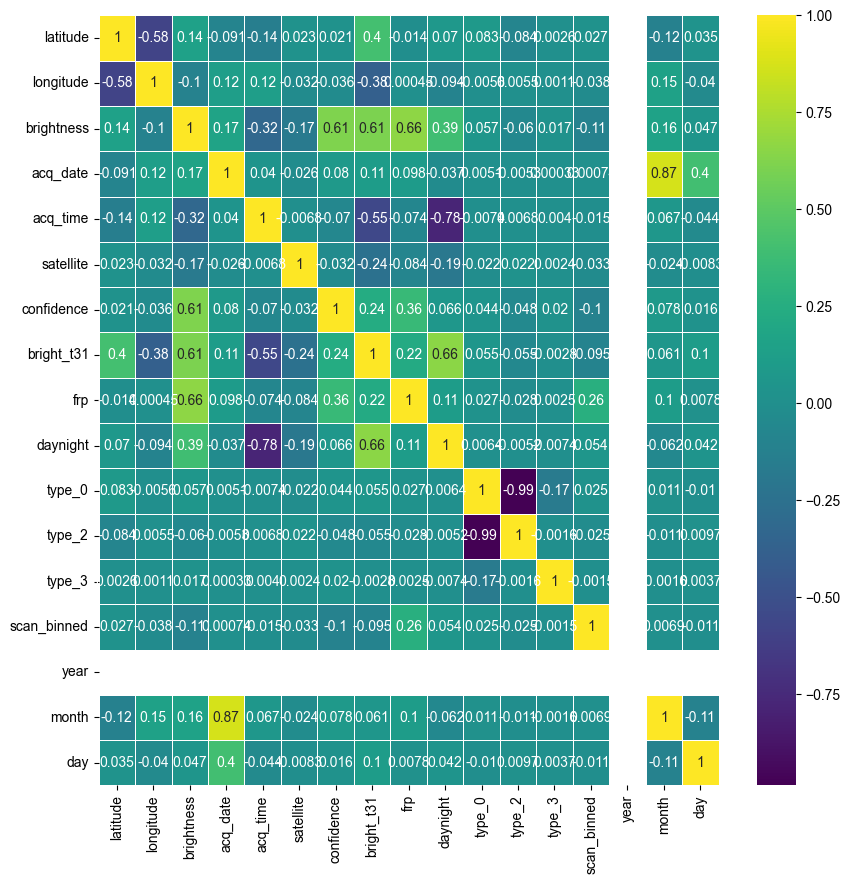

In [78]:
plt.figure(figsize=(10, 10))
sns.heatmap(forest.corr(),annot=True,cmap='viridis',linewidths=.5)

In [21]:
forest = forest.drop(['track'], axis = 1)

In [22]:
print("The scan column")
print(forest['scan'].value_counts())
print()
print("The aqc_time column")
print(forest['acq_time'].value_counts())
print()
print("The satellite column")
print(forest['satellite'].value_counts())
print()
print("The instrument column")
print(forest['instrument'].value_counts())
print()
print("The version column")
print(forest['version'].value_counts())
print()
print("The daynight column")
print(forest['daynight'].value_counts())
print()

The scan column
scan
1.0    8284
1.1    6000
1.2    3021
1.3    2412
1.4    1848
1.5    1610
1.6    1451
1.7    1281
1.8    1041
1.9     847
2.0     707
2.2     691
2.1     649
2.3     608
2.5     468
2.4     433
2.8     422
3.0     402
2.7     366
2.9     361
2.6     347
3.1     259
3.2     244
3.6     219
3.4     203
3.3     203
3.8     189
3.9     156
4.7     149
4.3     137
3.7     134
3.5     134
4.1     120
4.6     118
4.5     116
4.2     108
4.0     103
4.4     100
4.8      70
Name: count, dtype: int64

The aqc_time column
acq_time
506     851
454     631
122     612
423     574
448     563
       ... 
246       1
1549      1
1724      1
1629      1
302       1
Name: count, Length: 662, dtype: int64

The satellite column
satellite
Aqua     20541
Terra    15470
Name: count, dtype: int64

The instrument column
instrument
MODIS    36011
Name: count, dtype: int64

The version column
version
6.3    36011
Name: count, dtype: int64

The daynight column
daynight
D    28203
N     7808
Na

In [23]:
forest = forest.drop(['instrument', 'version'], axis = 1)
forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,8/1/2019,56,Terra,48,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,8/1/2019,56,Terra,71,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,8/1/2019,57,Terra,42,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,8/1/2019,57,Terra,33,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,8/1/2019,57,Terra,36,298.8,27.6,D,0


In [24]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

forest['daynight'] = forest['daynight'].map(daynight_map)
forest['satellite'] = forest['satellite'].map(satellite_map)
forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,8/1/2019,56,1,48,297.3,6.6,1,0
1,-11.7924,142.0850,319.3,1.0,8/1/2019,56,1,71,297.3,11.3,1,0
2,-12.8398,132.8744,311.6,3.1,8/1/2019,57,1,42,298.7,23.1,1,0
3,-14.4306,143.3035,310.1,1.1,8/1/2019,57,1,33,296.1,6.5,1,0
4,-12.4953,131.4897,310.3,4.0,8/1/2019,57,1,36,298.8,27.6,1,0


In [25]:
print(forest.columns)

Index(['latitude', 'longitude', 'brightness', 'scan', 'acq_date', 'acq_time',
       'satellite', 'confidence', 'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')


In [26]:
forest['type'].value_counts()

type
0    35666
2      335
3       10
Name: count, dtype: int64

In [27]:
types = pd.get_dummies(forest['type'])
forest = pd.concat([forest, types], axis=1)
forest = forest.drop(['type'], axis = 1)
forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,2,3
0,-11.8070,142.0583,313.0,1.0,8/1/2019,56,1,48,297.3,6.6,1,True,False,False
1,-11.7924,142.0850,319.3,1.0,8/1/2019,56,1,71,297.3,11.3,1,True,False,False
2,-12.8398,132.8744,311.6,3.1,8/1/2019,57,1,42,298.7,23.1,1,True,False,False
3,-14.4306,143.3035,310.1,1.1,8/1/2019,57,1,33,296.1,6.5,1,True,False,False
4,-12.4953,131.4897,310.3,4.0,8/1/2019,57,1,36,298.8,27.6,1,True,False,False


In [28]:
forest = forest.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})

In [29]:
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
forest['scan_binned'] = pd.cut(forest['scan'], bins=bins, labels=labels)
forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned
0,-11.8070,142.0583,313.0,1.0,8/1/2019,56,1,48,297.3,6.6,1,True,False,False,1
1,-11.7924,142.0850,319.3,1.0,8/1/2019,56,1,71,297.3,11.3,1,True,False,False,1
2,-12.8398,132.8744,311.6,3.1,8/1/2019,57,1,42,298.7,23.1,1,True,False,False,4
3,-14.4306,143.3035,310.1,1.1,8/1/2019,57,1,33,296.1,6.5,1,True,False,False,2
4,-12.4953,131.4897,310.3,4.0,8/1/2019,57,1,36,298.8,27.6,1,True,False,False,4


In [30]:
forest['acq_date'] = pd.to_datetime(forest['acq_date'])


In [31]:
forest = forest.drop(['scan'], axis = 1)

In [32]:
forest['year'] = forest['acq_date'].dt.year
forest.head()

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned,year
0,-11.8070,142.0583,313.0,2019-08-01,56,1,48,297.3,6.6,1,True,False,False,1,2019
1,-11.7924,142.0850,319.3,2019-08-01,56,1,71,297.3,11.3,1,True,False,False,1,2019
2,-12.8398,132.8744,311.6,2019-08-01,57,1,42,298.7,23.1,1,True,False,False,4,2019
3,-14.4306,143.3035,310.1,2019-08-01,57,1,33,296.1,6.5,1,True,False,False,2,2019
4,-12.4953,131.4897,310.3,2019-08-01,57,1,36,298.8,27.6,1,True,False,False,4,2019


In [33]:
forest['month'] = forest['acq_date'].dt.month
forest['day'] = forest['acq_date'].dt.day

In [34]:
forest.shape

(36011, 17)

In [35]:
y = forest['confidence']
fin = forest.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31', 'type_0'], axis = 1)

<Axes: >

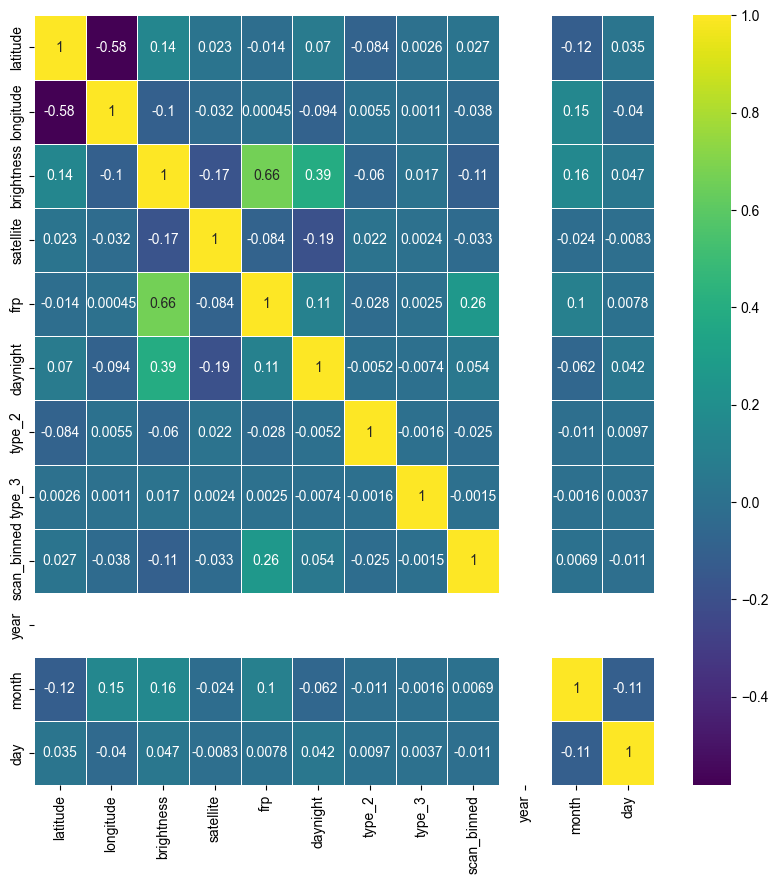

In [36]:
plt.figure(figsize=(10, 10))
sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)

In [37]:
fin.head()

,latitude,longitude,brightness,satellite,frp,daynight,type_2,type_3,scan_binned,year,month,day
0,-11.8070,142.0583,313.0,1,6.6,1,False,False,1,2019,8,1
1,-11.7924,142.0850,319.3,1,11.3,1,False,False,1,2019,8,1
2,-12.8398,132.8744,311.6,1,23.1,1,False,False,4,2019,8,1
3,-14.4306,143.3035,310.1,1,6.5,1,False,False,2,2019,8,1
4,-12.4953,131.4897,310.3,1,27.6,1,False,False,4,2019,8,1


In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(fin.iloc[:, :500], y, test_size=0.2)

In [41]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)
random_model.fit(Xtrain, ytrain)
y_pred = random_model.predict(Xtest)
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

95.33 %


In [42]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

65.35 %


In [43]:
import pickle 
saved_model = pickle.dump(random_model, open('ForestModelOld.pickle','wb'))

In [44]:
random_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [50]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 300, stop = 500, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)
min_samples_split = [2, 3, 5]
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(random_grid)

{'n_estimators': [300, 310, 321, 331, 342, 352, 363, 373, 384, 394, 405, 415, 426, 436, 447, 457, 468, 478, 489, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


In [51]:
rf_random = RandomizedSearchCV(estimator = random_model, 
param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42)
rf_random.fit(Xtrain, ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.1s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=478; total time=  21.1s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=47

C:\Users\Umesh Manchikanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
84 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Umesh Manchikanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Umesh Manchikanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Umesh Manchikanti\AppData\Local\Programs\P

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                                   random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [300, 310, 321, 331,
                                                         342, 352, 363, 373,
                                                         384, 394, 405, 415,
                                                         426, 436, 447, 457,
                                                         468, 478, 489, 500]},
                   random_state=42, verbose=2)

In [52]:
rf_random.best_params_

{'n_estimators': 394,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [54]:
random_new = RandomForestRegressor(n_estimators = 394, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt',
                                      max_depth = 25, bootstrap = True)
#Fit
random_new.fit(Xtrain, ytrain)
y_pred1 = random_new.predict(Xtest)
#Checking the accuracy
random_model_accuracy1 = round(random_new.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy1, 2), '%')

95.38 %


In [55]:
random_model_accuracy2 = round(random_new.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy2, 2), '%')

67.19 %


In [59]:
saved_model = pickle.dump(random_new, open('ForestModel.pickle','wb'))

In [74]:
import os

file_path = r'C:\Users\Umesh Manchikanti\Desktop\fire_archive.csv'

if os.access(file_path, os.R_OK):
    print("File is readable.")
else:
    print("File is not readable or does not exist.")


File is readable.


In [77]:
import pickle

saved_model = "ForestModel.pickle"  # Replace this with the actual path to your pickled model file

with open(saved_model, 'rb') as f:
    reg_from_pickle = pickle.load(f)



In [64]:
!pip install bz2file

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for bz2file: filename=bz2file-0.98-py3-none-any.whl size=6889 sha256=eaae788fa718ef8b6f751e749f8373fa32be491228b3a5bd74df7596028f961c
  Stored in directory: c:\users\umesh manchikanti\appdata\local\pip\cache\wheels\00\6c\b7\2041e2fdd1054d6790af0017d86d35fec3d0198396174c747d
Successfully built bz2file


In [65]:
import bz2

compressionLevel = 9
source_file = 'ForestModel.pickle'
destination_file = 'ForestModel.bz2'

with open(source_file, 'rb') as data:
    tarbz2contents = bz2.compress(data.read(), compressionLevel)
    
fh = open(destination_file, "wb")
fh.write(tarbz2contents)
fh.close()